<a href="https://colab.research.google.com/github/IbrahemElsherif/ML_algorithms/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score
import seaborn as sns


In [35]:
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, flip_y=0.1, n_classes=2)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
param_grid = {"n_neighbors": range(1, 11)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv = 5)


In [38]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 11)})

In [39]:
best_k = grid_search.best_params_['n_neighbors']
best_k

9

In [40]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=9)

In [41]:
y_pred = knn_best.predict(X_test)

In [42]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy with k={best_k}: {acc:.2f} ")

Accuracy with k=9: 0.90 


In [43]:
k_values = range(1, 11)
accuracies = []
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  accuracies.append(accuracy_score(y_test, y_pred))

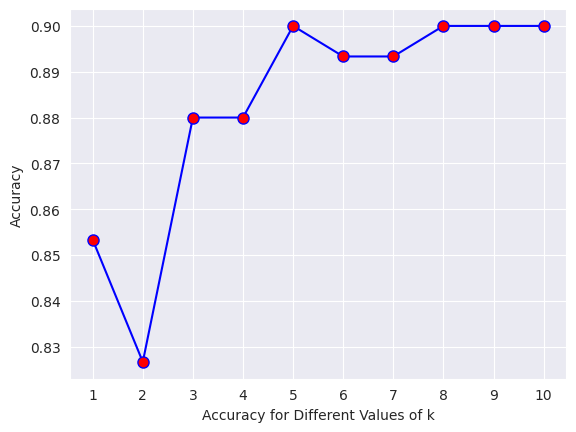

In [44]:
sns.set_style("darkgrid")
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', markerfacecolor='r', markersize=8)
plt.xlabel('Accuracy for Different Values of k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()